# Z-Score for Remove Outliers
### Prerequisites - moderate knowledge about Mean and Standard Deviation

### Z-Score (Standard Score) is a number which indicates the values is how many standard deviation far from the mean.



#### Z-score Equation
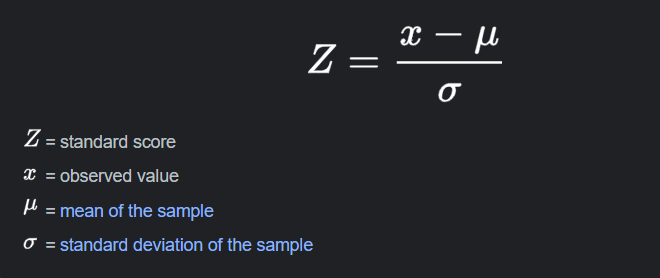
#### Ex.
#### If, std is 7.5 and mean is 21 and value is 22.75

In [6]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import statistics


#### Std equation,
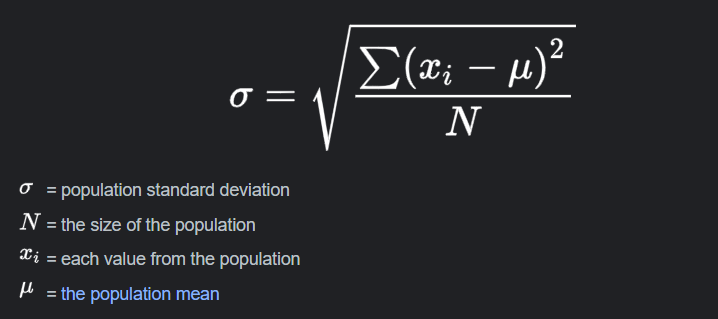

#### Low standard deviation means data are more close around the mean.

#### Ex.

In [125]:
statistics.mean([2, 7, 14, 22, 30])

15

In [126]:
statistics.stdev([15, 15, 15, 14, 16])

0.7071067811865476

In [127]:
statistics.mean([15, 15, 15, 14, 16])

15

In [128]:
statistics.stdev([2, 7, 14, 22, 30])

11.269427669584644

________________________________________

In [7]:
df = pd.read_csv("deputies_dataset.csv") #https://www.kaggle.com/code/rtatman/data-cleaning-challenge-outliers/input?select=deputies_dataset.csv
df.sample(5)                             #Backup link, if dataset removed by owner(me ofcourse😅) from Kaggle: https://drive.google.com/file/d/17B3vDjkRgt_1tL_WV-TfukFwBXrDtdm7/view?usp=share_link

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value
716994,0,2011-05-15 00:00:00,2407,PSD,BA,Antonio Brito,2.818012e+12,Fuels and lubricants.,HP COMÉRCIO E DERIVADOS DE PETRÓLEO LTDA,92
694388,0,2011-07-15 00:00:00,2408,PP,PB,Aguinaldo Ribeiro,NaN,Telephony,RAMAL,263
98610,0,2013-10-16 00:00:00,1626,PSD,PR,Eduardo Sciarra,9.955190e+11,Maintenance of Office,MEDIATO IMÓVEIS LTDA,3685
256012,0,2013-01-24 00:00:00,1282,PSDB,PA,Nilson Pinto,6.945995e+12,Fuels and lubricants.,Posto Grão Pará,100
2791348,0,2009-07-16 00:00:00,1593,SD,ES,Carlos Manato,2.449992e+12,Telephony,VIVO S.A.,462


In [6]:
df.shape

(3014902, 10)

In [7]:
df.describe()

,bugged_date,deputy_id,receipt_social_security_number,receipt_value
count,3.014902e+06,3.014902e+06,2.493950e+06,3.014902e+06
mean,1.642873e-02,1.869101e+03,1.372664e+13,5.791575e+02
std,1.271174e-01,7.014751e+02,2.057245e+13,1.925418e+03
min,0.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.467000e+03,2.087236e+12,5.000000e+01
50%,0.000000e+00,1.882000e+03,7.423935e+12,1.420000e+02
75%,0.000000e+00,2.340000e+03,1.123836e+13,4.720000e+02
max,1.000000e+00,3.173000e+03,9.874986e+13,2.150000e+05


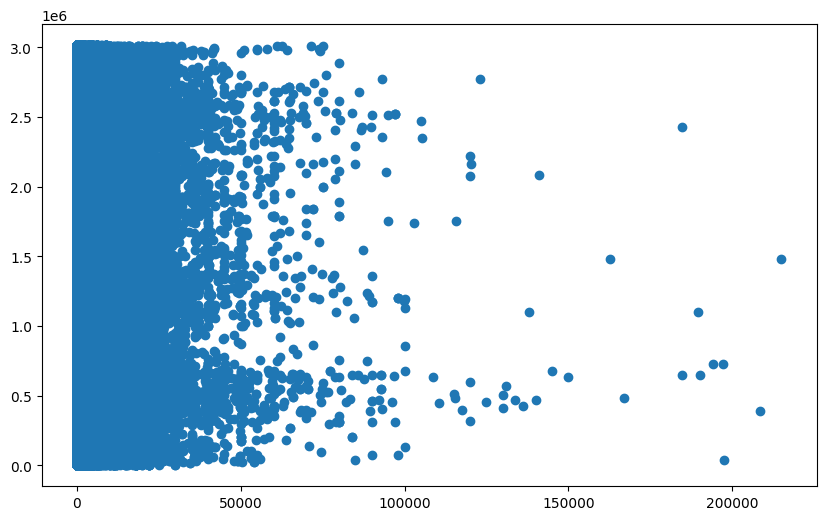

In [12]:
y = np.arange(1, df.shape[0]+1) 
plt.scatter(df["receipt_value"], y) 
plt.xlabel = "receipt_value"
plt.show()

In [13]:
df.receipt_value.mean()

579.1574668098665

In [14]:
df.receipt_value.std()

1925.4182444211124

In [21]:
df['zscore'] = ( df.receipt_value - df.receipt_value.mean() ) / df.receipt_value.std()
df.head()

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,zscore
0,0,2013-03-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,3.530749e+12,Fuels and lubricants.,AUTO POSTO 314 NORTE LTDA,70,-0.264440
1,0,2013-07-24 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,104,-0.246781
2,0,2013-02-17 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100,-0.248859
3,0,2013-03-15 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100,-0.248859
4,0,2013-01-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,77,-0.260804


In [17]:
df[df['zscore']>3]

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,zscore
93,0,2013-04-22 00:00:00,1772,PSB,SP,Abelardo Camarinha,5.470495e+13,Dissemination of the Parliamentary Activity.,AGÊNCIA WILSON MATTOS PROM. ARTÍSTICAS SC LTDA...,20000,10.086558
94,0,2013-05-20 00:00:00,1772,PSB,SP,Abelardo Camarinha,5.470495e+13,Dissemination of the Parliamentary Activity.,AGÊNCIA WILSON MATTOS PROM. ARTÍSTICAS SC LTDA...,22000,11.125293
95,0,2013-06-20 00:00:00,1772,PSB,SP,Abelardo Camarinha,5.470495e+13,Dissemination of the Parliamentary Activity.,AGÊNCIA WILSON MATTOS PROM. ARTÍSTICAS SC LTDA...,22000,11.125293
96,0,2013-07-18 00:00:00,1772,PSB,SP,Abelardo Camarinha,5.470495e+13,Dissemination of the Parliamentary Activity.,AGÊNCIA WILSON MATTOS PROM. ARTÍSTICAS SC LTDA...,15000,7.489719
97,0,2013-08-26 00:00:00,1772,PSB,SP,Abelardo Camarinha,5.470495e+13,Dissemination of the Parliamentary Activity.,AGÊNCIA WILSON MATTOS PROM. ARTÍSTICAS SC LTDA...,22000,11.125293
...,...,...,...,...,...,...,...,...,...,...,...
3013432,0,2009-09-02 00:00:00,1709,PSC,PA,Zequinha Marinho,2.377906e+12,Dissemination of the Parliamentary Activity.,GH COMUNICAÇÃO MARKETING REPRESENTAÇÕES,9000,4.373513
3013437,0,2009-08-01 00:00:00,1709,PSC,PA,Zequinha Marinho,2.434285e+12,Dissemination of the Parliamentary Activity.,PRISMAC LTDA.,8700,4.217703
3013438,0,2009-07-05 00:00:00,1709,PSC,PA,Zequinha Marinho,2.434285e+12,Dissemination of the Parliamentary Activity.,PRISMAC NEG. IMOB. E TURISTICOS LTDA.,6400,3.023157
3013439,0,2009-09-05 00:00:00,1709,PSC,PA,Zequinha Marinho,2.434285e+12,Dissemination of the Parliamentary Activity.,PRISMAC NEG. IMOB. E TURISTÍCOS LTDA.,7200,3.438652


In [18]:
df[df['zscore']<-3] #data which have standard deviation high than 3 or -3 are always outliers. (sometimes it can be 2.3 or 2.5 also possible in place of 3, sometimes 4 is also possible, it depends on dataset)

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,zscore


In [19]:
df[(df.zscore<-3) | (df.zscore>3)]

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,zscore
93,0,2013-04-22 00:00:00,1772,PSB,SP,Abelardo Camarinha,5.470495e+13,Dissemination of the Parliamentary Activity.,AGÊNCIA WILSON MATTOS PROM. ARTÍSTICAS SC LTDA...,20000,10.086558
94,0,2013-05-20 00:00:00,1772,PSB,SP,Abelardo Camarinha,5.470495e+13,Dissemination of the Parliamentary Activity.,AGÊNCIA WILSON MATTOS PROM. ARTÍSTICAS SC LTDA...,22000,11.125293
95,0,2013-06-20 00:00:00,1772,PSB,SP,Abelardo Camarinha,5.470495e+13,Dissemination of the Parliamentary Activity.,AGÊNCIA WILSON MATTOS PROM. ARTÍSTICAS SC LTDA...,22000,11.125293
96,0,2013-07-18 00:00:00,1772,PSB,SP,Abelardo Camarinha,5.470495e+13,Dissemination of the Parliamentary Activity.,AGÊNCIA WILSON MATTOS PROM. ARTÍSTICAS SC LTDA...,15000,7.489719
97,0,2013-08-26 00:00:00,1772,PSB,SP,Abelardo Camarinha,5.470495e+13,Dissemination of the Parliamentary Activity.,AGÊNCIA WILSON MATTOS PROM. ARTÍSTICAS SC LTDA...,22000,11.125293
...,...,...,...,...,...,...,...,...,...,...,...
3013432,0,2009-09-02 00:00:00,1709,PSC,PA,Zequinha Marinho,2.377906e+12,Dissemination of the Parliamentary Activity.,GH COMUNICAÇÃO MARKETING REPRESENTAÇÕES,9000,4.373513
3013437,0,2009-08-01 00:00:00,1709,PSC,PA,Zequinha Marinho,2.434285e+12,Dissemination of the Parliamentary Activity.,PRISMAC LTDA.,8700,4.217703
3013438,0,2009-07-05 00:00:00,1709,PSC,PA,Zequinha Marinho,2.434285e+12,Dissemination of the Parliamentary Activity.,PRISMAC NEG. IMOB. E TURISTICOS LTDA.,6400,3.023157
3013439,0,2009-09-05 00:00:00,1709,PSC,PA,Zequinha Marinho,2.434285e+12,Dissemination of the Parliamentary Activity.,PRISMAC NEG. IMOB. E TURISTÍCOS LTDA.,7200,3.438652


In [62]:
df2 = df[(df.zscore>3)]
df2.head()

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,zscore
0,0,2013-03-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,3.530749e+12,Fuels and lubricants.,AUTO POSTO 314 NORTE LTDA,70,-0.264440
1,0,2013-07-24 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,104,-0.246781
2,0,2013-02-17 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100,-0.248859
3,0,2013-03-15 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100,-0.248859
4,0,2013-01-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,77,-0.260804


In [63]:
df2.shape

(2975608, 11)

In [64]:
df2 = df[(df.zscore>-3) & (df.zscore<3)]
df2.head()

,bugged_date,receipt_date,deputy_id,political_party,state_code,deputy_name,receipt_social_security_number,receipt_description,establishment_name,receipt_value,zscore
0,0,2013-03-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,3.530749e+12,Fuels and lubricants.,AUTO POSTO 314 NORTE LTDA,70,-0.264440
1,0,2013-07-24 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,104,-0.246781
2,0,2013-02-17 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100,-0.248859
3,0,2013-03-15 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100,-0.248859
4,0,2013-01-27 00:00:00,1772,PSB,SP,Abelardo Camarinha,8.202116e+12,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,77,-0.260804


In [65]:
df.shape[0] - df2.shape[0]

39294

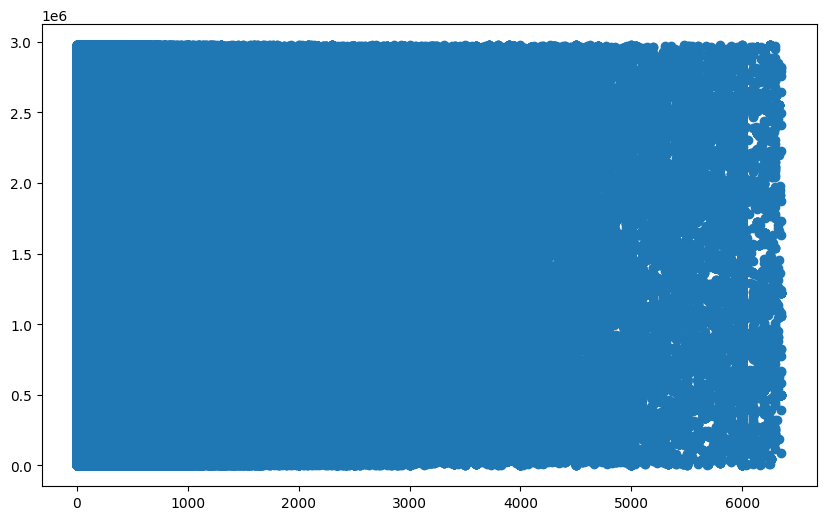

In [66]:
y = np.arange(1, df2.shape[0]+1) 
plt.scatter(df2["receipt_value"], y) #it is a way to graphcally plot a dataset or any part of the dataset, there will be a separate jupyter notebook regarding this
plt.xlabel = "receipt_value"
plt.show()

# Done, Thanks to visit, 
# Wish you luck in this field ✨